In [7]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.metrics

# Real world example: Digit Classification

We will now create a simple NN model to classify handwritten digits. We'll use the famous MNIST database which comes with the Keras library.

## Loading and exploring the dataset

In [31]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [33]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

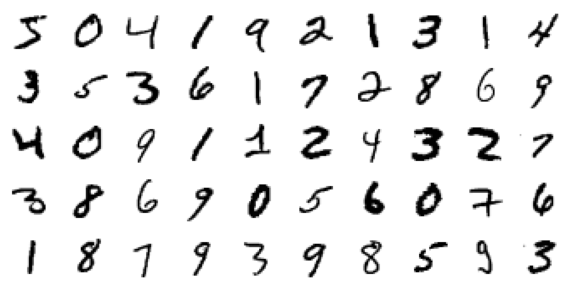

In [35]:
f, axes = plt.subplots(5, 10, figsize=(10, 5))
axes = axes.flatten()
for i in range(50):
    axes[i].imshow(x_train[i,:,:], cmap=plt.get_cmap('binary'))
    axes[i].axis('off')

In [36]:
print(np.min(x_train))
print(np.max(x_train))

0
255


In [37]:
x_train[0,:,:].flatten().shape

(784,)

## Simple Feed Forward Neural Network

We'll use a simple feed forward neural network classifier to predict the digit given the input pixels. The architecture of this network is as follows:

![alt text](figures/mnist_ff.jpg)

* Pixels in each input image will be flattened so that they form a vector of $28 \times 28 = 784$ numbers.
* Given this vector as input, the neural network will predict the associated digit.

### Normalizing Inputs

Neural networks train best when the magnitude of the inputs is small. But as you saw earlier, each pixel in the image takes values from 0 to 255, which is too big a range. Therefore, we must normalize the inputs. For this example, we'll rescale the pixel values so that they are between 0 and 1.

In [38]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

### Flattening the inputs

Now, we will flatten the inputs so that they become vectors of 784 numbers.

In [40]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

In [41]:
x_train.shape

(60000, 784)

### Categorizing the output

The classes in `y_train` and `y_test` are stored as numbers. We need to convert those to one-hot vectors as we did in multiclass classification.

In [45]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

### Training and Evaluation

In [83]:
# number of hidden units, try changing that
n_hidden1 = 10

model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(x_train.shape[1],)),
        layers.Dense(n_hidden1, activation='tanh'),
        #layers.Dropout(0.5),
        #layers.Dense(n_hidden2, activation='tanh'),
        #layers.Dropout(0.5),
        layers.Dense(y_train_onehot.shape[1], activation="softmax"),
    ]
)
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [84]:
# train the model
h = model.fit(x = x_train, y=y_train_onehot, verbose=True, epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 0s 881us/step - loss: 0.9053 - accuracy: 0.7825
Epoch 2/50
469/469 [==============================] - 0s 860us/step - loss: 0.4233 - accuracy: 0.8978
Epoch 3/50
469/469 [==============================] - 0s 856us/step - loss: 0.3340 - accuracy: 0.9116
Epoch 4/50
469/469 [==============================] - 0s 860us/step - loss: 0.2966 - accuracy: 0.9190
Epoch 5/50
469/469 [==============================] - 0s 869us/step - loss: 0.2752 - accuracy: 0.9233
Epoch 6/50
469/469 [==============================] - 0s 863us/step - loss: 0.2608 - accuracy: 0.9269
Epoch 7/50
469/469 [==============================] - 0s 902us/step - loss: 0.2502 - accuracy: 0.9290
Epoch 8/50
469/469 [==============================] - 0s 868us/step - loss: 0.2420 - accuracy: 0.9317
Epoch 9/50
469/469 [==============================] - 0s 858us/step - loss: 0.2350 - accuracy: 0.9329
Epoch 10/50
469/469 [==============================] - 0s 876us/step - loss: 0.229

In [85]:
# test the model
ypred = model.predict(x_test, batch_size=x_test.shape[1]//10)

In [86]:
# convert probabilistic outputs into hard decisions by just taking the element with the largest probability
ypred_hard = np.argmax(ypred, axis=1)

In [87]:
# compute accuracy
sklearn.metrics.accuracy_score(y_test, ypred_hard)

0.9326

In [88]:
# compute confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, ypred_hard)
cm

array([[ 952,    0,    3,    1,    1,    9,    9,    3,    2,    0],
       [   0, 1122,    4,    1,    0,    1,    3,    2,    2,    0],
       [  11,    4,  949,   13,   10,    5,    7,    7,   25,    1],
       [   4,    4,   16,  934,    2,   24,    0,    6,   15,    5],
       [   2,    1,    7,    1,  919,    3,   12,    5,    4,   28],
       [  12,    2,    2,   34,    3,  802,    9,    2,   20,    6],
       [  10,    2,    9,    1,    5,   16,  912,    2,    1,    0],
       [   0,    6,   23,    8,    3,    2,    0,  956,    4,   26],
       [  11,   15,    6,   23,    7,   22,    9,   11,  861,    9],
       [   6,    6,    3,   13,   25,   13,    0,   20,    4,  919]],
      dtype=int64)

In [92]:
W, b = model.layers[0].get_weights()
W.shape

(784, 10)

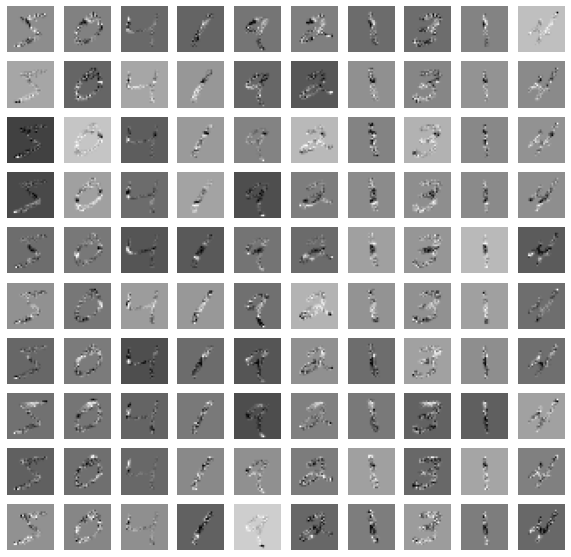

In [120]:
f, axes = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        x_sample = x_train[j,:]
        r = np.reshape(b[i] + W[:,i]*x_sample, (28, 28))
        axes[i,j].imshow(r, cmap=plt.get_cmap('binary'))
        axes[i,j].axis('off')